# Filtri

In questo notebook vediamo gli effetti che i filtri hanno sulle immagini. 

In [5]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from scipy.ndimage import convolve, correlate
from scipy import misc,ndimage


# Necessario per mostrare le figure nei notebooks
%matplotlib inline


img_src = './data/'

In [6]:
def img_show(image,**argv):
    plt.figure(figsize=(10,10))
    plt.imshow(image,**argv) # display the image
    plt.axis('off') 
    plt.show()


def img_info(image):
    print(image.shape, image.dtype, type(image)) 
    
    
def get_contrast(img):
    return np.max(img*255) - np.min(img*255)

def base_stats(img):
    return "Contrasto: {0:.0f} (valore massimo: {1:.0f}; valore minimo: {2:.0f})".format(get_contrast(img),np.max(img*255),np.min(img*255))

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def normalize(img):
    return (img-np.min(img))/(np.max(img)-np.min(img))

Definiamoci la funzione di convoluzione:

In [7]:
def convolve2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    
    kernel_height, kernel_width = kernel.shape
    
    a = kernel_width//2
    b = kernel_height//2
    
    
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2*a, image.shape[1] + 2*b))
    image_padded[a:-a, b:-b] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x]=(kernel * image_padded[y: y+kernel_width, x: x+kernel_height]).sum()

    return output

Proviamo a vederla all'opera

Contrasto: 243 (valore massimo: 243; valore minimo: 0)


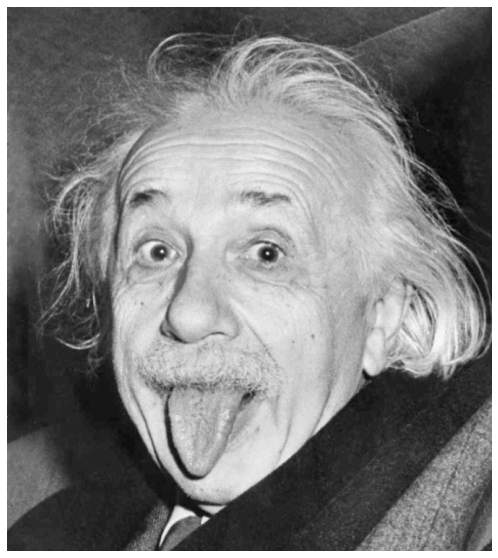

In [8]:
image = mp_image.imread(os.path.join(img_src,'einstein.png'))

image = image[:,:,0]

print(base_stats(image))
img_show(image,cmap=cm.gray)

Cominciamo con un filtro semplice: l'average filter, definito come
$$
k = \frac{1}{9}
\left[
\begin{array}{ccc}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{array}
\right]
$$

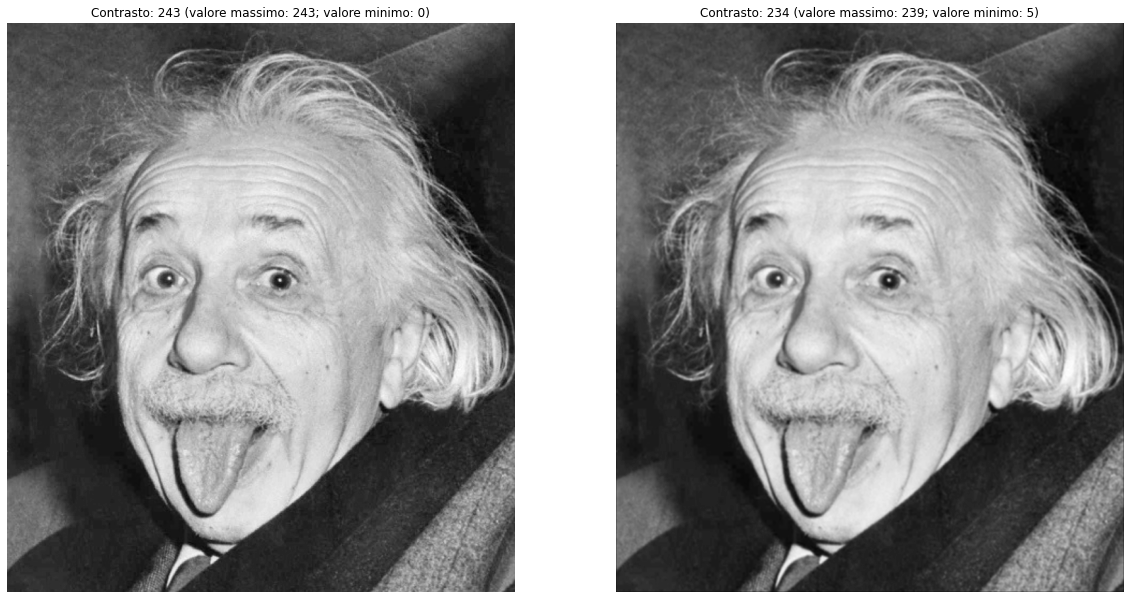

In [9]:
k = np.full((3,3),1.0/9.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve2d(image,k)

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

Proviamo a fare uno zoom e vedere i dettagli

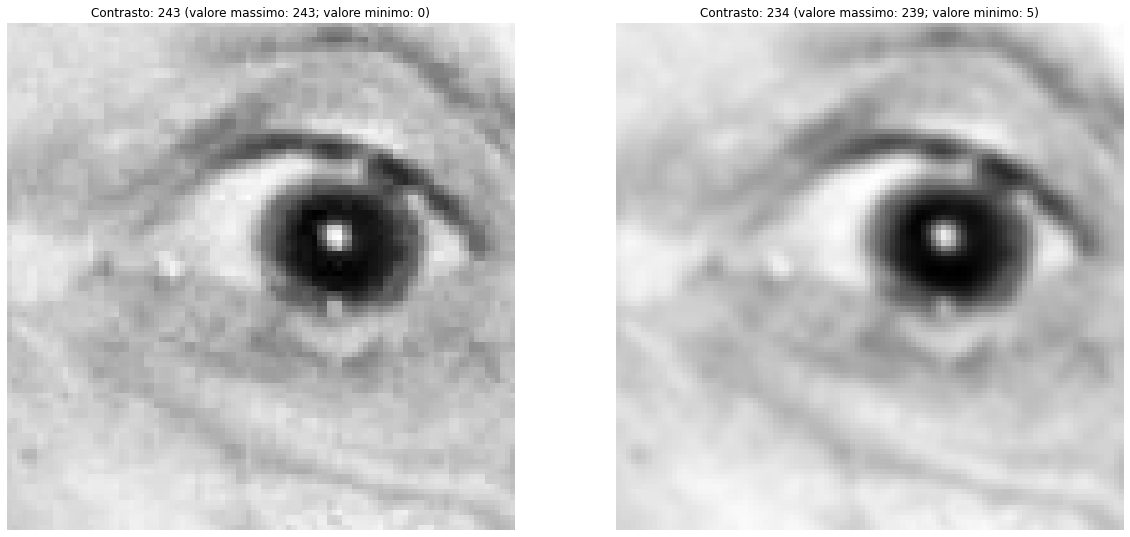

In [10]:
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve2d(image,k)

fig.add_subplot(1, 2, 2) 
plt.imshow(out[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

Allarghiamo il filtro

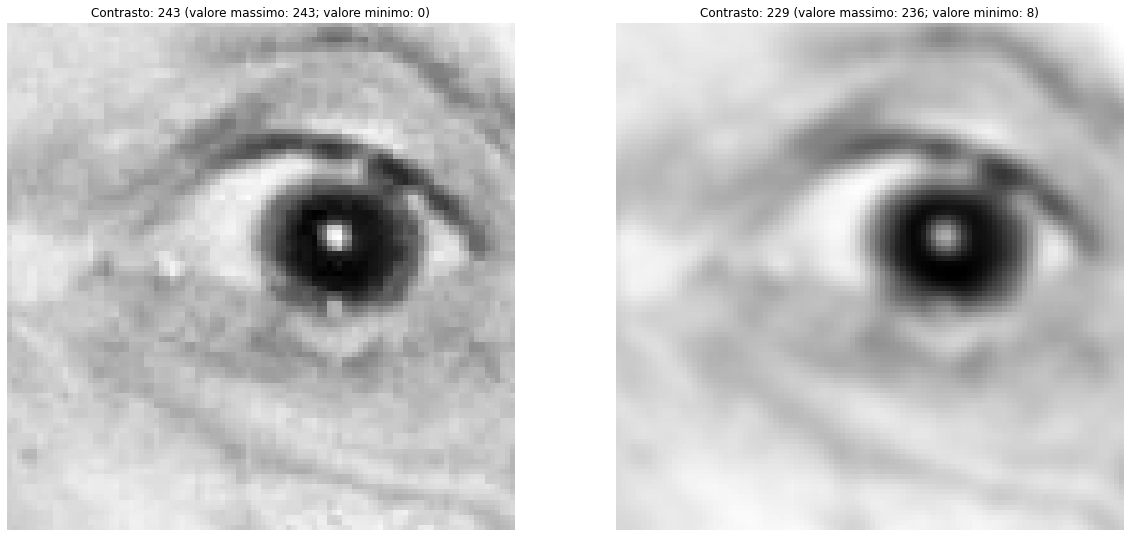

In [11]:
k = np.full((5,5),1.0/25.0)


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve2d(image,k)

fig.add_subplot(1, 2, 2) 
plt.imshow(out[350:450,350:450],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

La funzione che stiamo analizzando è lenta. (riuscite a dire perché?). `SciPy`mette a disposizione una funzione predefinita molto più efficiente. 



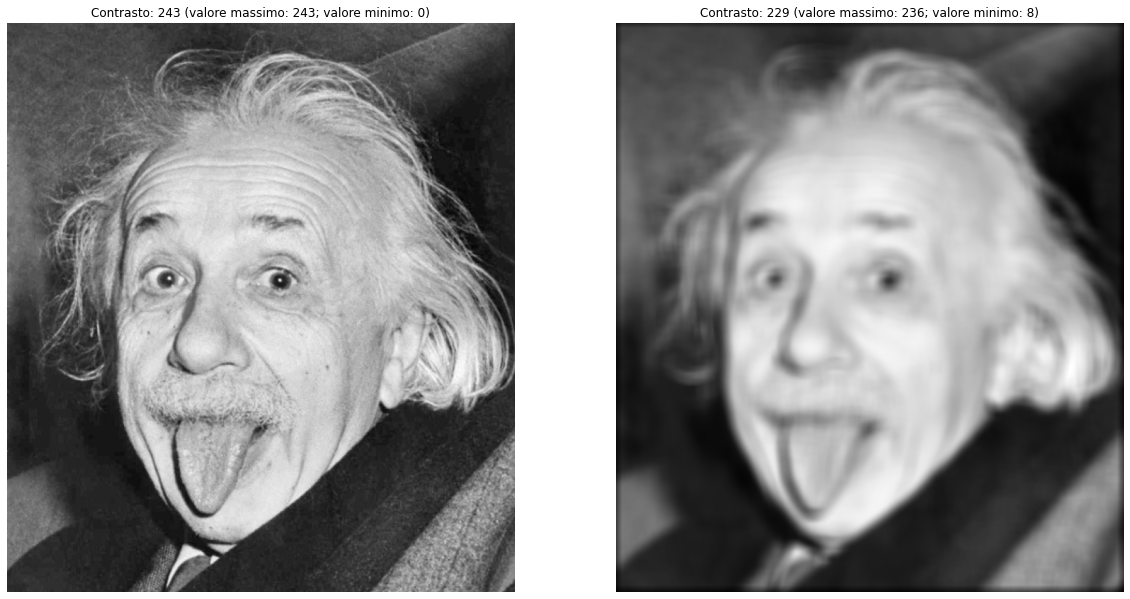

In [12]:
k = np.full((20,20),1.0/200.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(convolve(image,k,mode='constant', cval=0.0),cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()

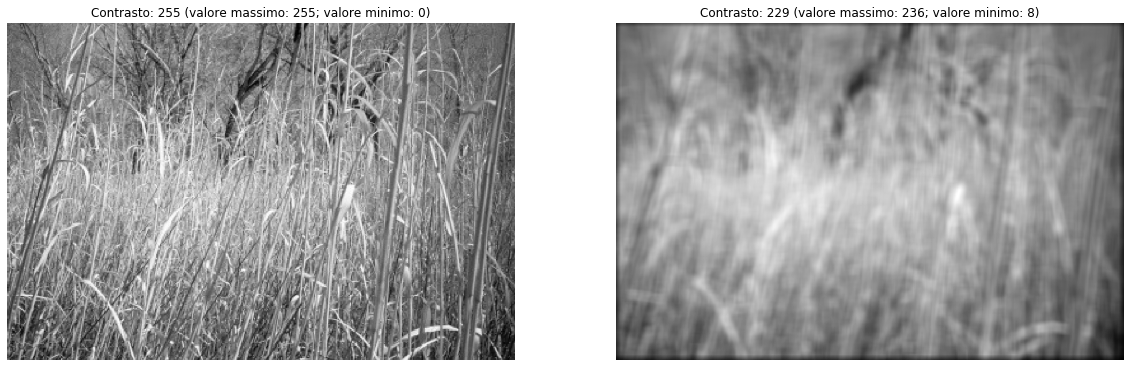

In [9]:
image = mp_image.imread(os.path.join(img_src,'prato.png'))[:,:,0]
fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(convolve(image,k,mode='constant', cval=0.0),cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()



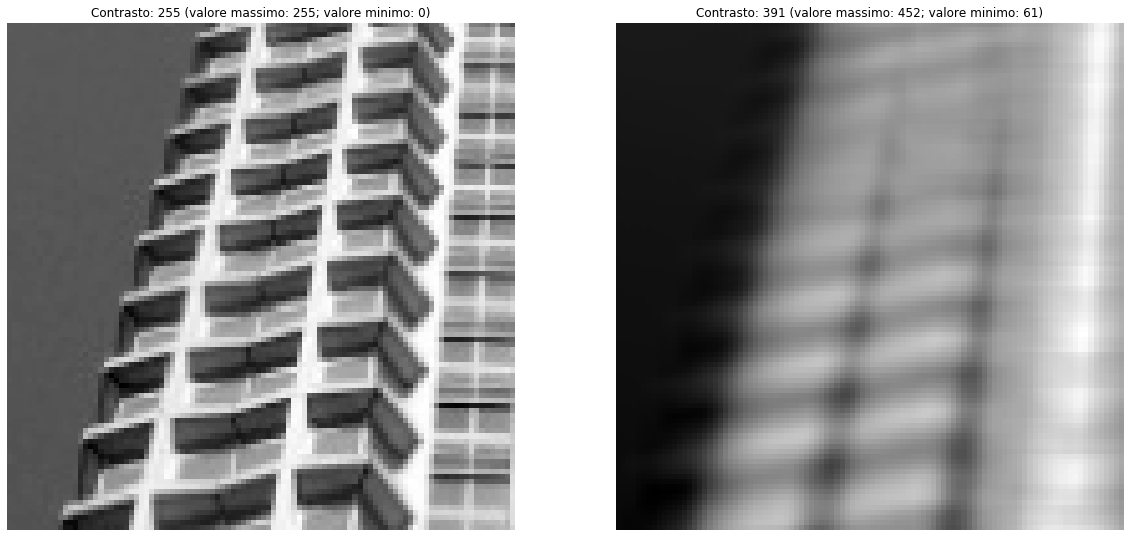

In [10]:
image = mp_image.imread(os.path.join(img_src,'grattacielo.png'))[:,:,0]

out = convolve(image,k,mode='constant', cval=0.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image[200:300,200:300],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(out[200:300,200:300],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()



Proviamo ad ampliare il range: 

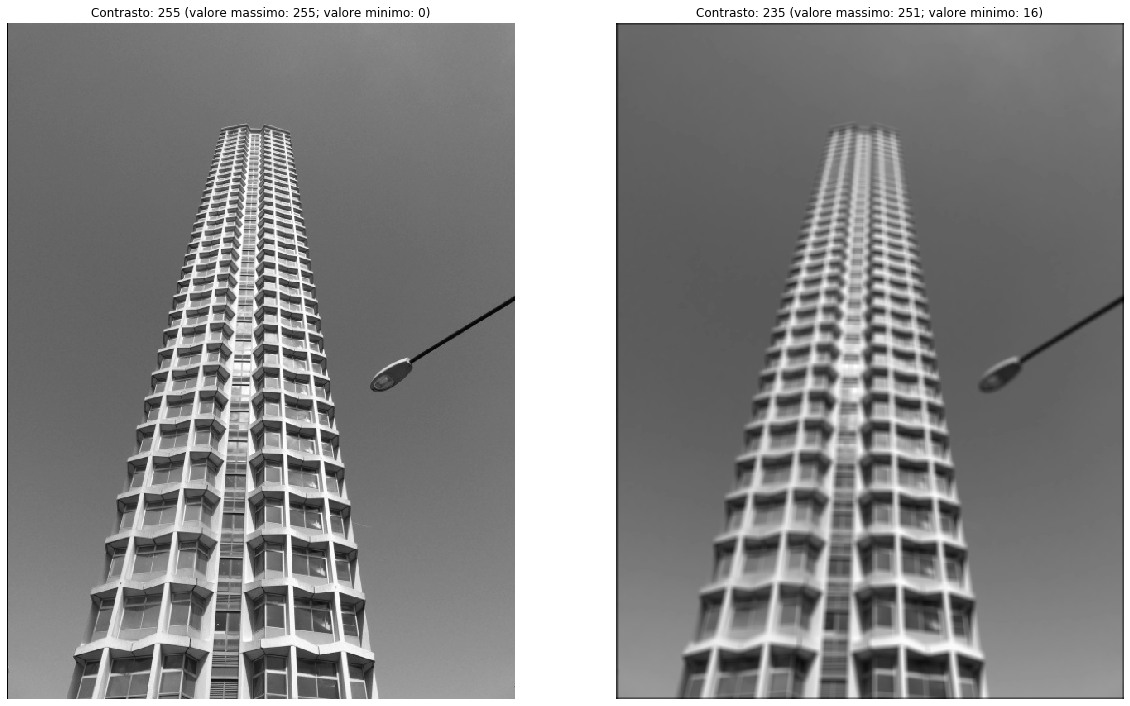

In [11]:
k = np.full((7,7),1.0/49.0)

image = mp_image.imread(os.path.join(img_src,'grattacielo.png'))[:,:,0]

out = convolve(image,k,mode='constant', cval=0.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()




Proviamo con un filtro gaussiano. 

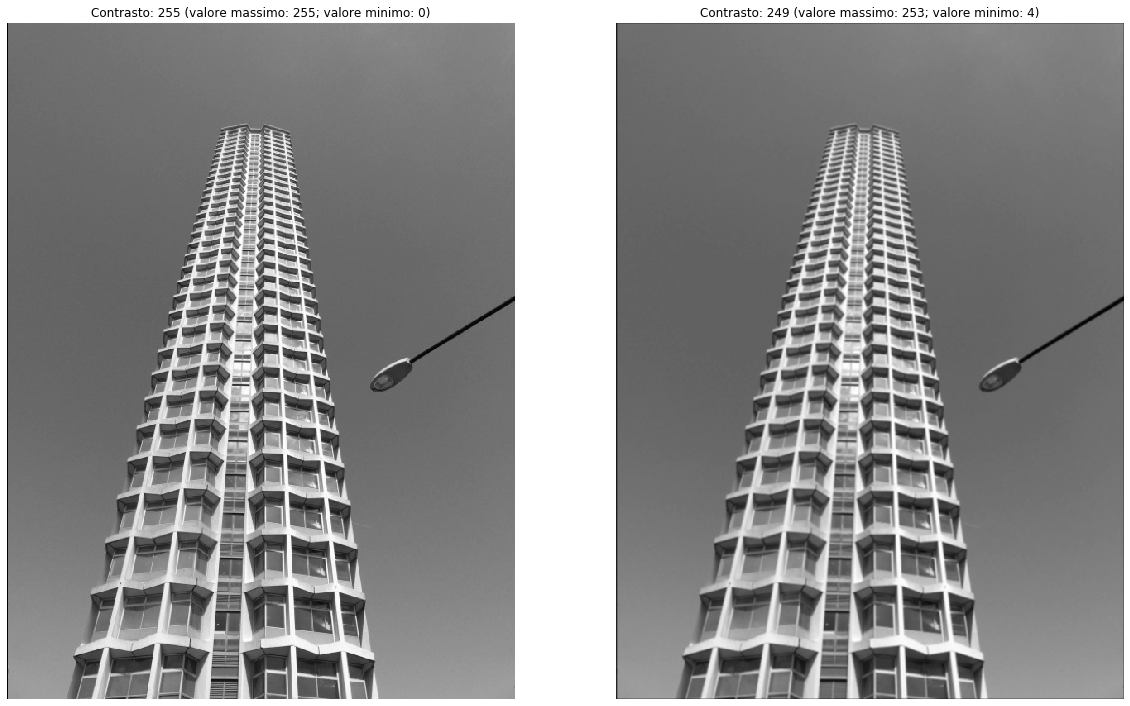

In [12]:
k = 1/16.0*np.array([
    [1,2,1],
    [2,4,2],
    [1,2,1]
]).astype(np.float32)

image = mp_image.imread(os.path.join(img_src,'grattacielo.png'))[:,:,0]

out = convolve(image,k,mode='constant', cval=0.0)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()



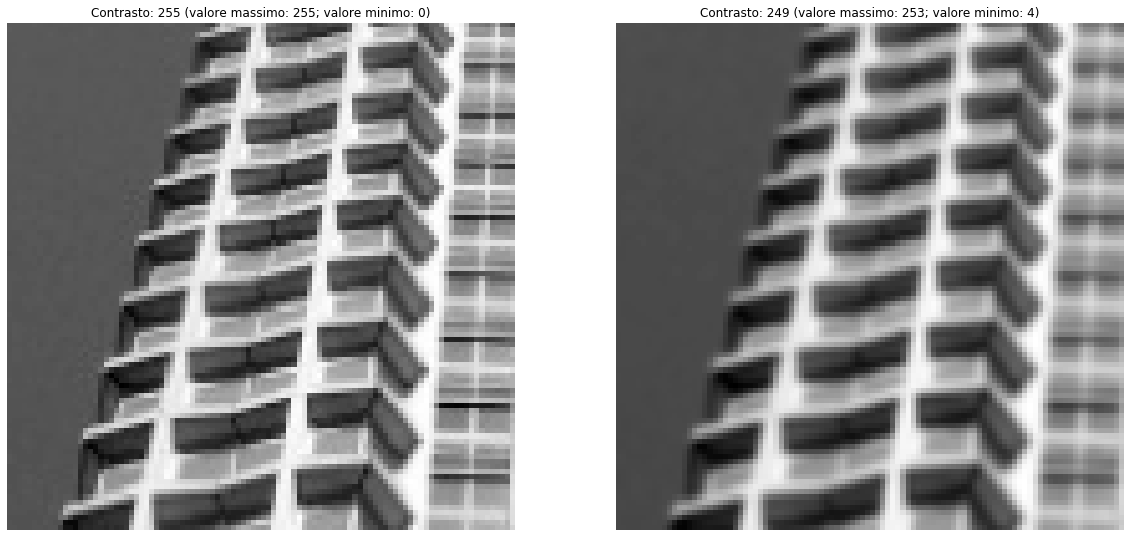

In [13]:

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image[200:300,200:300],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 2, 2) 
plt.imshow(out[200:300,200:300],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()




Riprendiamo l'immagine di Einstein e proviamo a vedere l'effetto di qualche altro filtro

In [14]:
image = mp_image.imread(os.path.join(img_src,'einstein2.png'))

image = image[:,:,0]

Filtro identità: 

$$k = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}$$

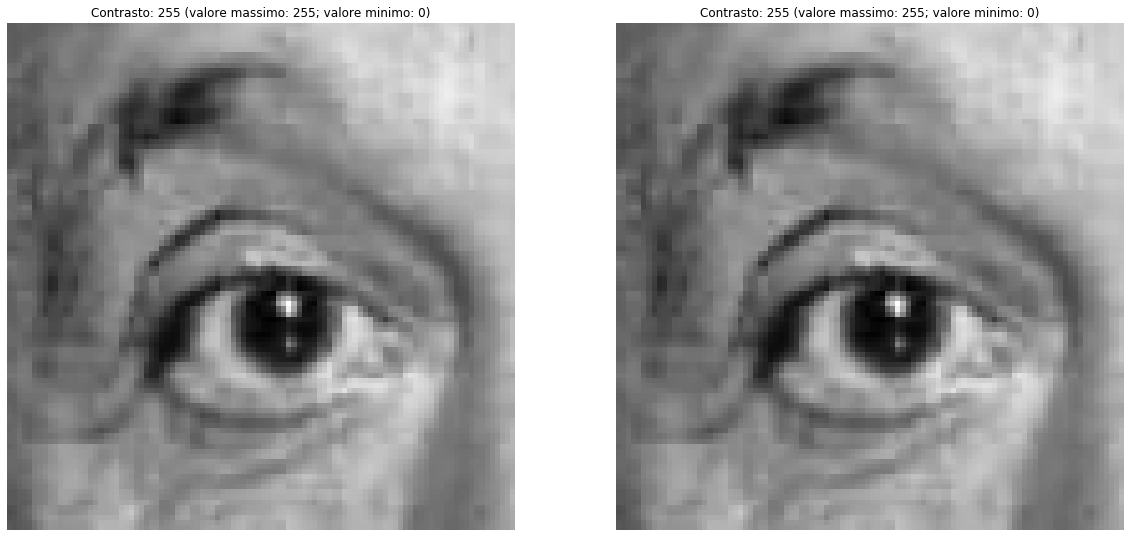

In [15]:
identity = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])



fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve(image,identity,mode='constant', cval=0.0)

fig.add_subplot(1, 2, 2) 
plt.imshow(out[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')


plt.show()

Filtro di shift: 

$$k = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}$$

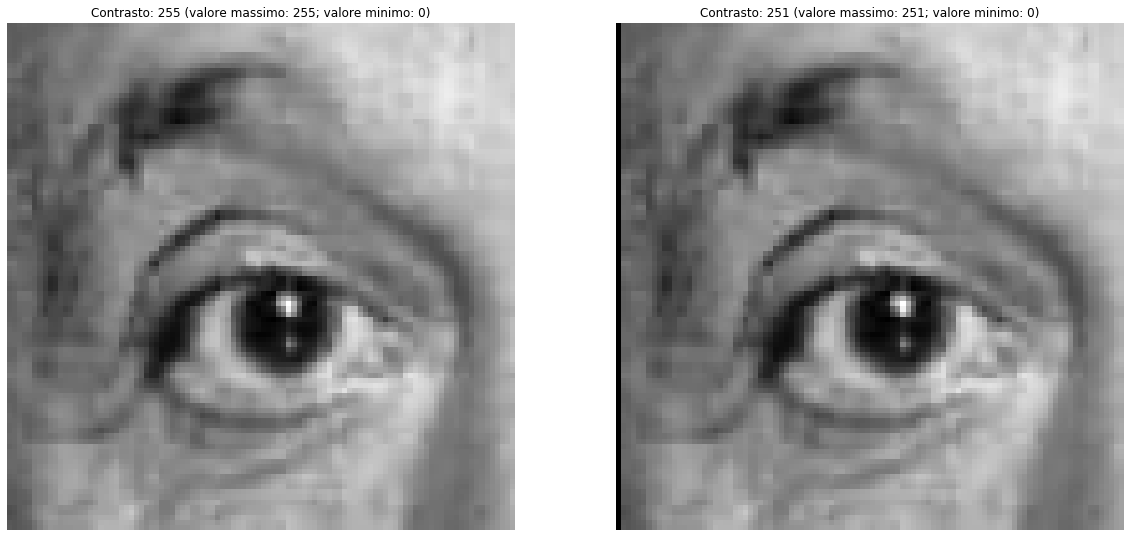

In [16]:
shift = np.array([
    [0,0,0],
    [0,0,1],
    [0,0,0]
])



fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve(image[280:380,145:245],shift,mode='constant', cval=0.0)


fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')


plt.show()

Filtro di Sobel (orizzontale)

$$k = \begin{bmatrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{bmatrix} 
    = \begin{bmatrix} 1 \\ 2 \\ 1\end{bmatrix} 
    \cdot\begin{bmatrix} 1 & 0 & -1\end{bmatrix} $$

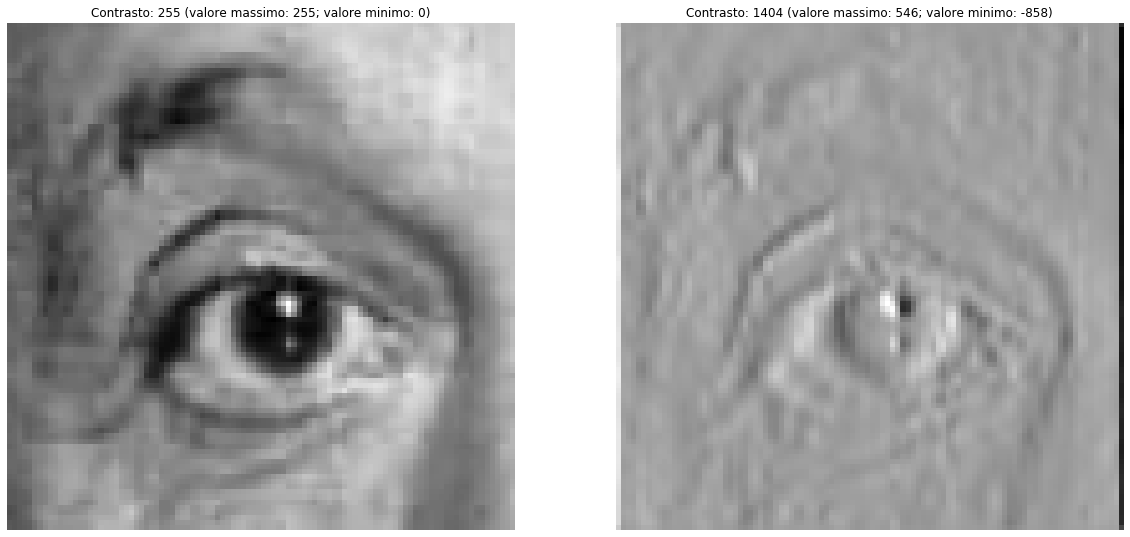

In [17]:
sobelH = np.array([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]
])



fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve(image[280:380,145:245],sobelH,mode='constant', cval=0.0)


fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')


plt.show()

Filtro di Sobel (verticale)

$$k = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} 
    = \begin{bmatrix} 1 \\ 0 \\-1\end{bmatrix} 
    \cdot\begin{bmatrix} 1 & 2 & -1\end{bmatrix} $$

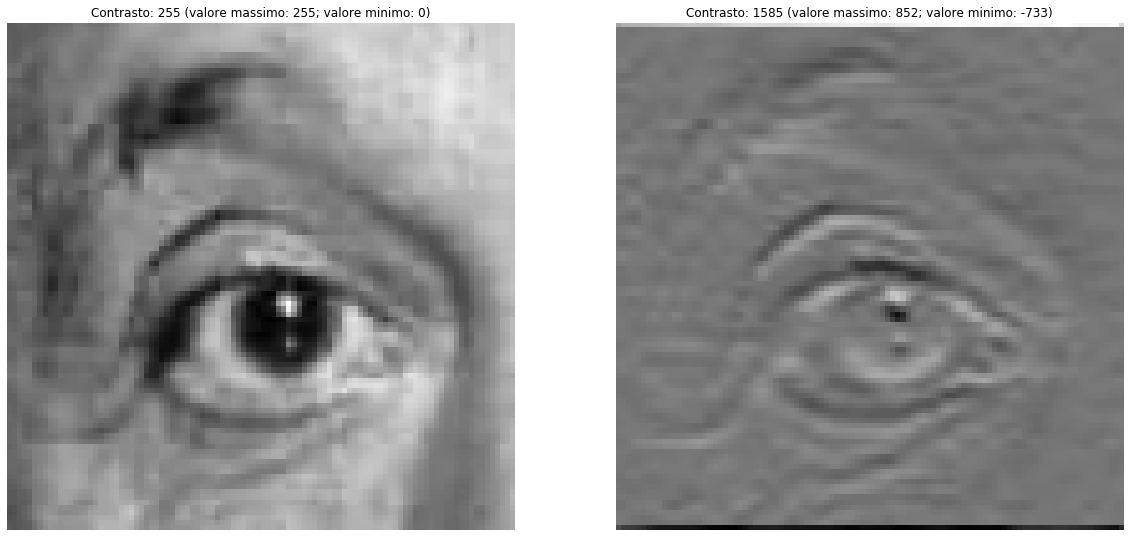

In [18]:
sobelV = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1]
])



fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = convolve(image[280:380,145:245],sobelV,mode='constant', cval=0.0)

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')


plt.show()

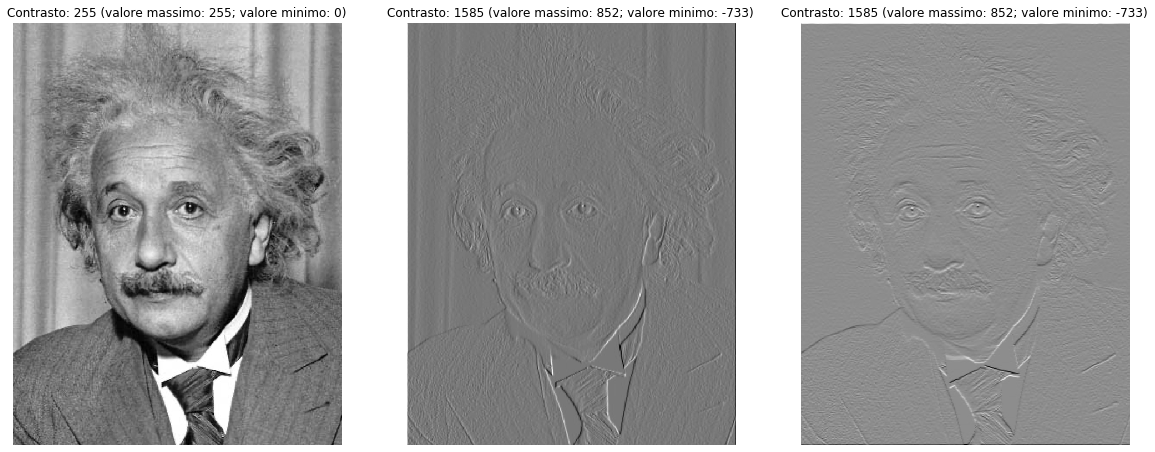

In [19]:

fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 3, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

fig.add_subplot(1, 3, 2) 
plt.imshow(convolve(image,sobelH,mode='constant', cval=0.0),cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(convolve(image,sobelV,mode='constant', cval=0.0),cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')



plt.show()

Sharpening

$$k = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 2 & 0 \\ 0 & 0 & 0  \end{bmatrix} 
    - \frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix} 
    = \frac{1}{9}\begin{bmatrix} -1 & -1 & -1 \\ -1 & 17 & -1 \\ -1 & -1 & -1 \end{bmatrix} $$

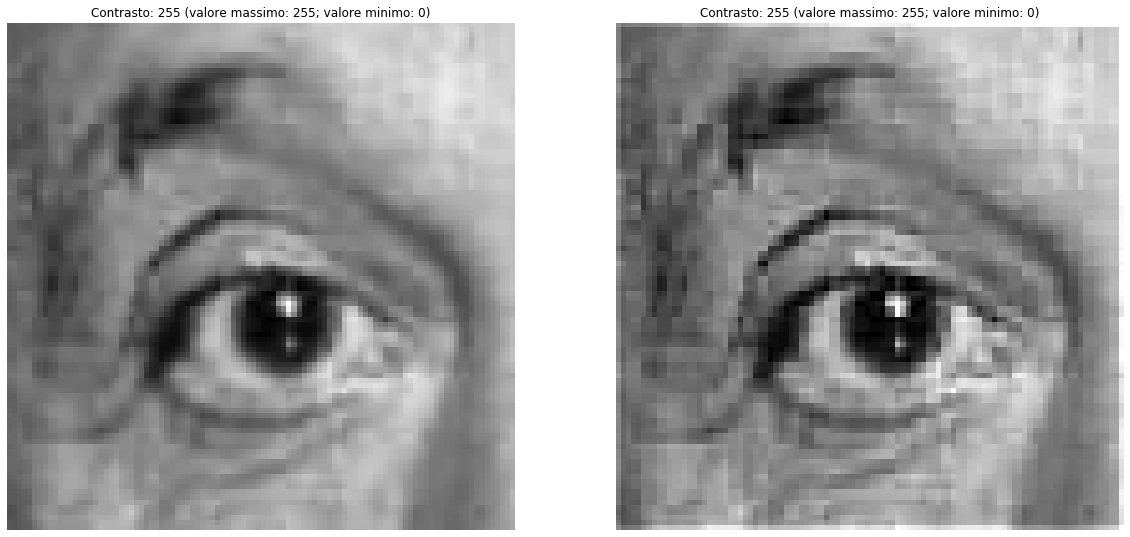

In [20]:
sharpen = np.array([
    [0,0,0],
    [0,2,0],
    [0,0,0]
]) - np.full((3,3),1.0/9.0)


fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = np.clip(convolve(image[280:380,145:245],sharpen,mode='constant', cval=0.0),0,1)

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')


plt.show()

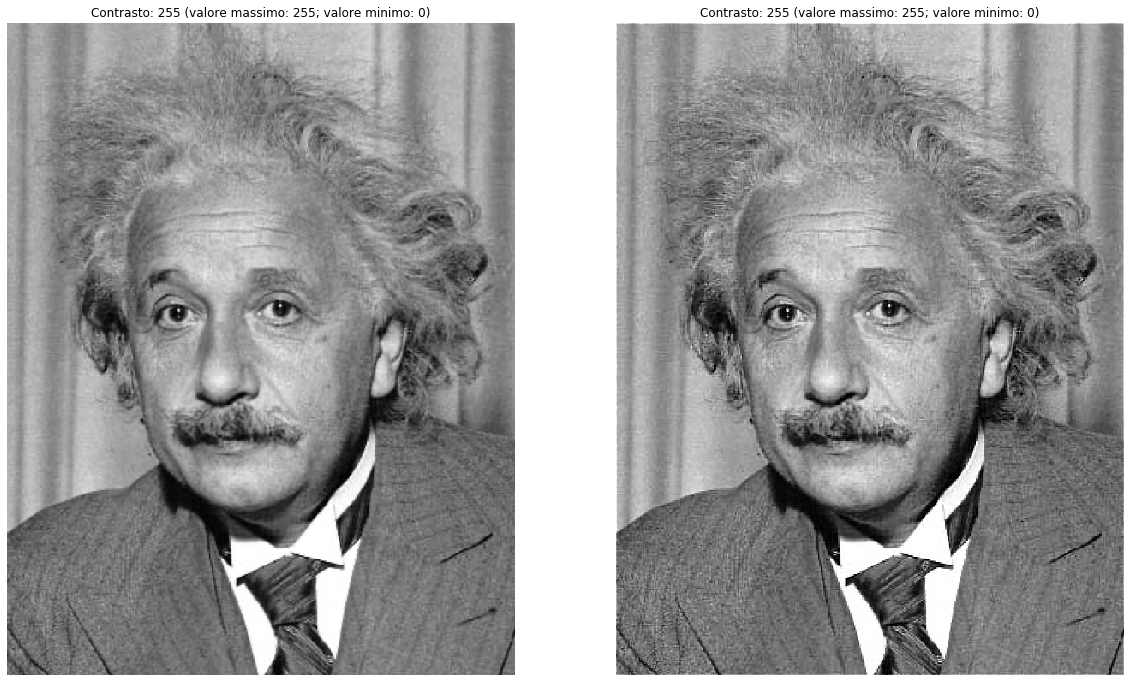

In [21]:

fig = plt.figure(figsize=(20, 20))


fig.add_subplot(1, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

out = np.clip(convolve(image,sharpen,mode='constant', cval=0.0),0,1)

fig.add_subplot(1, 2, 2) 
plt.imshow(out,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')


plt.show()

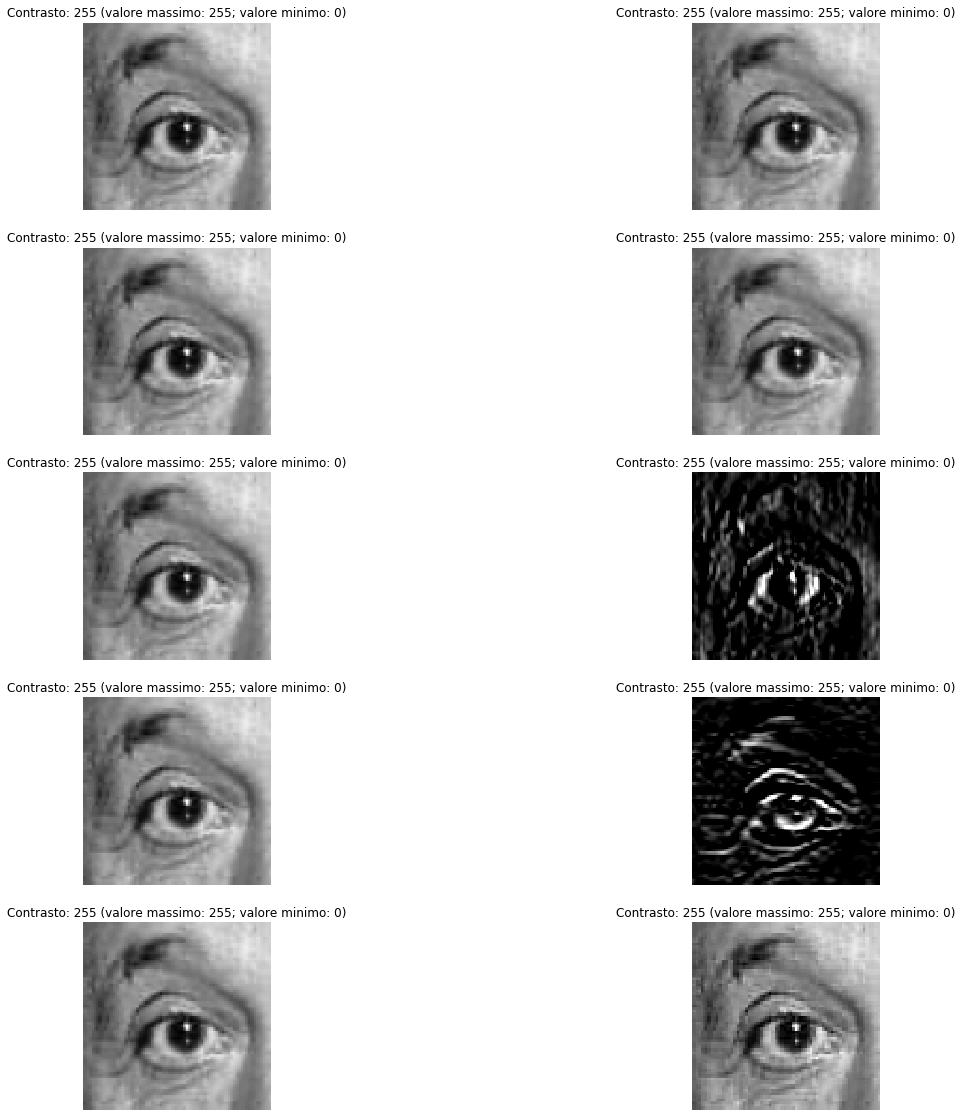

In [22]:
fig = plt.figure(figsize=(20, 20))


fig.add_subplot(5, 2, 1) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

img_id = convolve(image,identity,mode='constant', cval=0.0)

fig.add_subplot(5, 2, 2) 
plt.imshow(img_id[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')


fig.add_subplot(5, 2, 3) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

img_shifted = np.clip(convolve(image,shift,mode='constant', cval=0.0),0,1)

fig.add_subplot(5, 2, 4) 
plt.imshow(img_shifted[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')



fig.add_subplot(5, 2, 5) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

image_sh = np.clip(convolve(image,sobelH,mode='constant', cval=0.0),0,1)

fig.add_subplot(5, 2, 6) 
plt.imshow(image_sh[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')




fig.add_subplot(5, 2, 7) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

image_sv = np.clip(convolve(image,sobelV,mode='constant', cval=0.0),0,1)

fig.add_subplot(5, 2, 8) 
plt.imshow(image_sv[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')



fig.add_subplot(5, 2, 9) 
plt.imshow(image[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')

image_sharpened = np.clip(convolve(image,sharpen,mode='constant', cval=0.0),0,1)

fig.add_subplot(5, 2, 10) 
plt.imshow(image_sharpened[280:380,145:245],cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')



plt.show()




## Filtri non lineari

In [23]:

def sp_noise(image,prob):
    output = np.ones(image.shape,np.float32)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
                


    return output*image #image + prob*np.random.randn(*image.shape)#

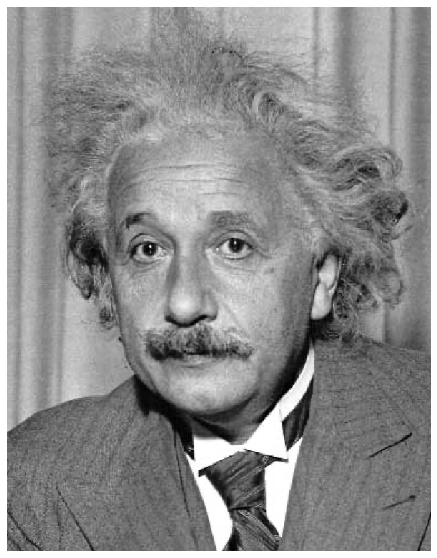

In [24]:
img_show(image,cmap=cm.gray)

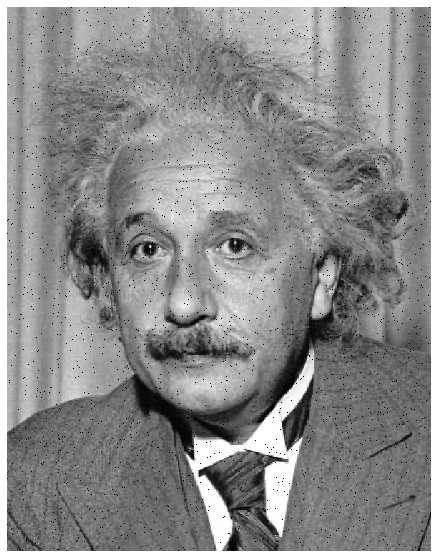

In [25]:
image = mp_image.imread(os.path.join(img_src,'einstein2.png'))[:,:,0]

image_noise = sp_noise(image,0.01)

img_show(image_noise,cmap=cm.gray)

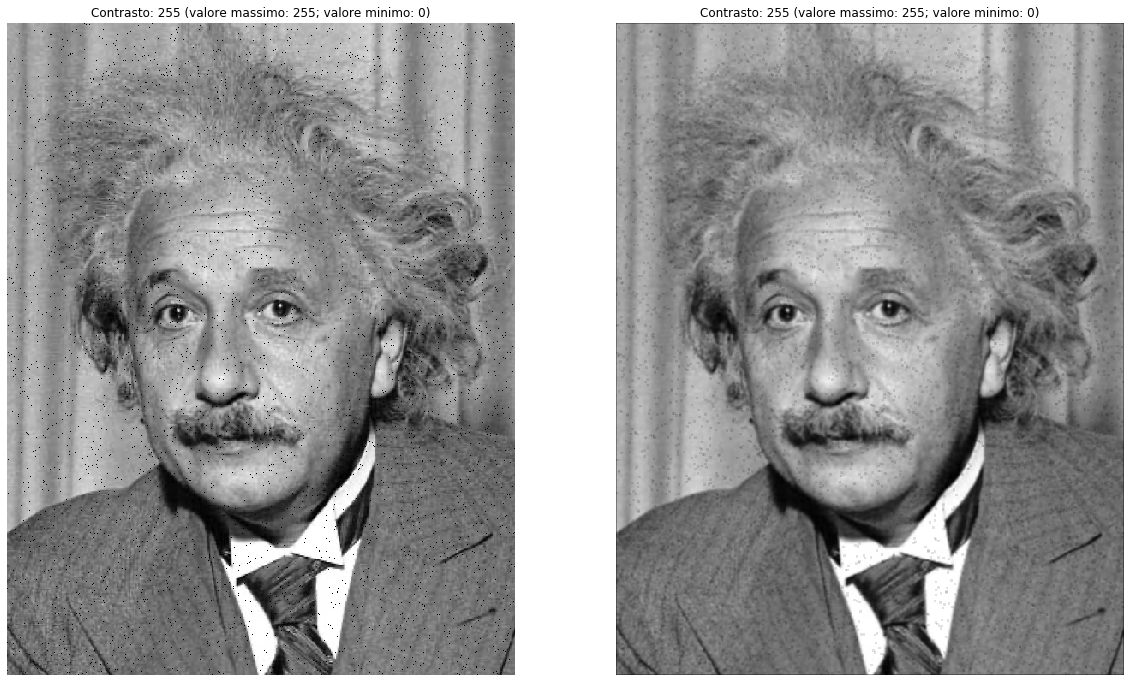

In [26]:
avg = np.full((3,3),1.0/9.0)


image_filtered = np.clip(convolve(image_noise,avg,mode='constant', cval=0.0),0,1)


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1) 
plt.imshow(image_noise,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')


fig.add_subplot(1, 2, 2) 
plt.imshow(image_filtered,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()



In [27]:
def median_filter(image, kernel_width=3,kernel_height=3):
    a = kernel_width//2
    b = kernel_height//2
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2*a, image.shape[1] + 2*b))
    image_padded[a:-a, b:-b] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):    
            output[y, x]=np.median(image_padded[y: y+kernel_width, x: x+kernel_height])

    return output

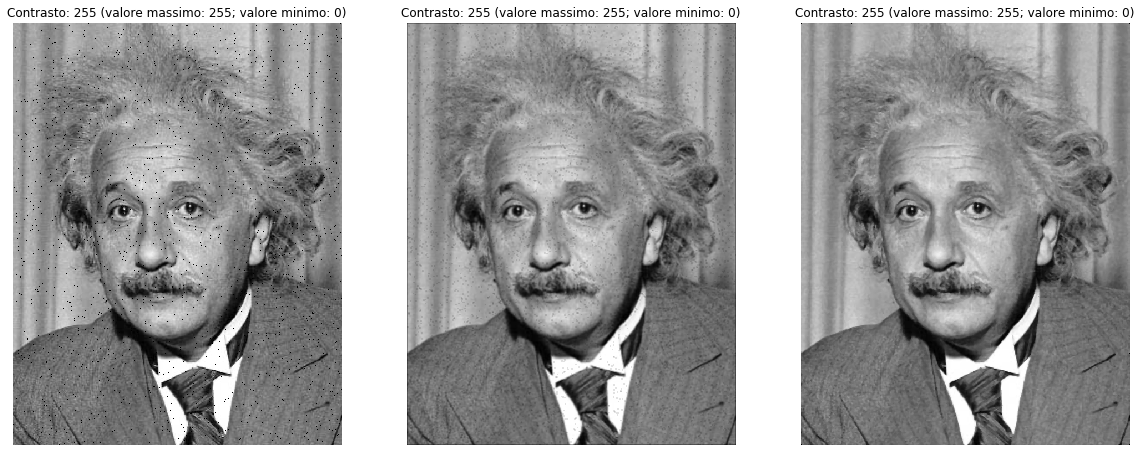

In [28]:
image_median = median_filter(image_noise,3,3)


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image_noise,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')


fig.add_subplot(1, 3, 2) 
plt.imshow(image_filtered,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(image_median,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

plt.show()


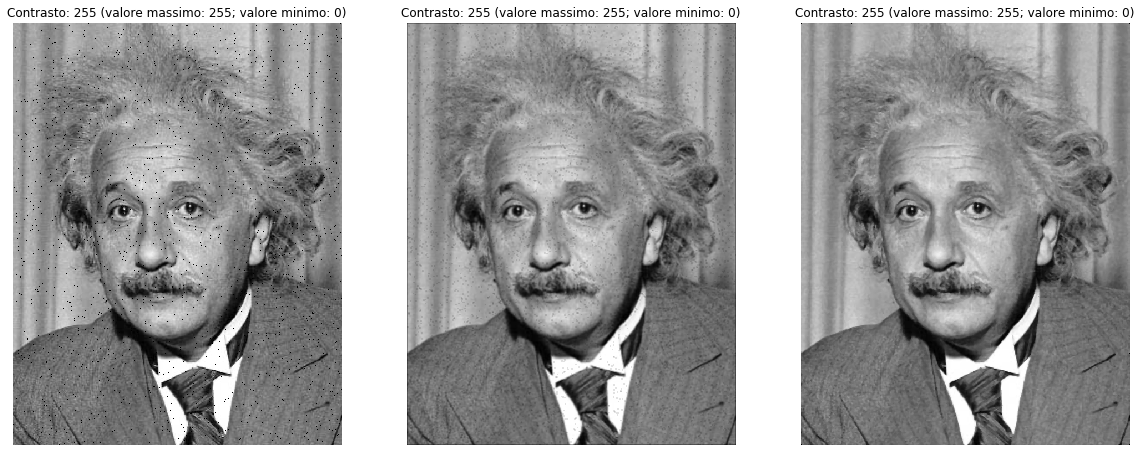

In [29]:
image_median = ndimage.median_filter(image_noise,3,mode='constant', cval=0.0)


fig = plt.figure(figsize=(20, 20))

fig.add_subplot(1, 3, 1) 
plt.imshow(image_noise,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')


fig.add_subplot(1, 3, 2) 
plt.imshow(image_filtered,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')

fig.add_subplot(1, 3, 3) 
plt.imshow(image_median,cmap=cm.gray)
plt.title(base_stats(out))
plt.axis('off')



plt.show()

## Convoluzione e correlazione

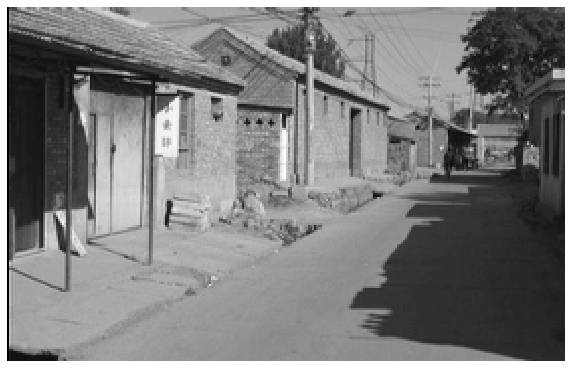

(175, 276) float32 <class 'numpy.ndarray'>


In [30]:
image = mp_image.imread(os.path.join(img_src,'strada.png'))[:,:,0]

image_small = ndimage.zoom(image,0.84)

img_show(image_small,cmap=cm.gray)
img_info(image_small)

In [ ]:
image_sq = correlate(image_small,image_small)

image_sq = (image_sq - np.min(image_sq))/(np.max(image_sq)- np.min(image_sq))

img_show(image_sq,cmap=cm.gray)

In [ ]:
filter = image_small[57:117, 107:167 ]#[60:160,110:210]

fig = plt.figure(figsize=(2, 2))

plt.imshow(filter,cmap=cm.gray)
plt.show()

In [ ]:
image_sq = correlate(image,filter)

image_sq = (image_sq - np.min(image_sq))/(np.max(image_sq)- np.min(image_sq))

img_show(image_sq,cmap=cm.gray)

In [ ]:
D = image_small - np.mean(image_small)

F2 = filter - np.mean(filter)

image_sq = normalize(correlate(D,F2))

img_show(image_sq,cmap=cm.gray)

In [ ]:
image_sq = normalize(convolve(D,F2))

img_show(image_sq,cmap=cm.gray)

## Sharp/Unsharp masks

In [ ]:
image = mp_image.imread(os.path.join(img_src,'einstein2.png'))

image = image[:,:,0]

In [ ]:
def sharpen(img,k,size=3):
    h_blur = np.full((size,size),1.0)/size**2
    
    output = (k+1)*image - k*convolve(img,h_blur)
    
    return normalize(image)#np.clip(output,0,1)

In [ ]:

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(2, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.axis('off')


fig.add_subplot(2, 2, 2) 
plt.imshow(sharpen(image,0.4),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(2, 2, 3) 
plt.imshow(sharpen(image,1),cmap=cm.gray)
plt.axis('off')

fig.add_subplot(2, 2, 4) 
plt.imshow(sharpen(image,5),cmap=cm.gray)
plt.axis('off')



plt.show()



In [ ]:
sigma = 5
h = 2

res = np.clip(h*image - ndimage.gaussian_filter(image,sigma),0,1)

fig = plt.figure(figsize=(20, 20))

fig.add_subplot(2, 2, 1) 
plt.imshow(image,cmap=cm.gray)
plt.title(base_stats(image))
plt.axis('off')


fig.add_subplot(2, 2, 2) 
plt.imshow(res,cmap=cm.gray)
plt.title(base_stats(res))
plt.axis('off')

plt.show()